In [1]:
import cv2
import os
import glob
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
warnings.filterwarnings("ignore")

# ensure that any edits to libraries you make are reloaded here automatically
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
styles = [
    'Achaemenid architecture',
    'Ancient Egyptian architecture',
    'Deconstructivism',
    'Gothic architecture',
    'Greek Revival architecture',
    'Novelty architecture',
    'Romanesque architecture',
    'Russian Revival architecture',
    'Tudor Revival architecture'
] 

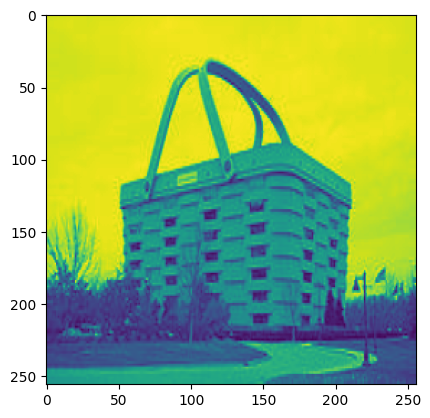

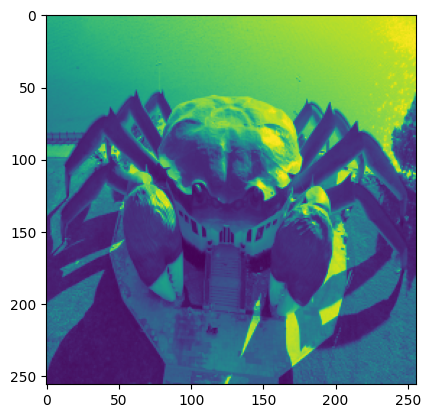

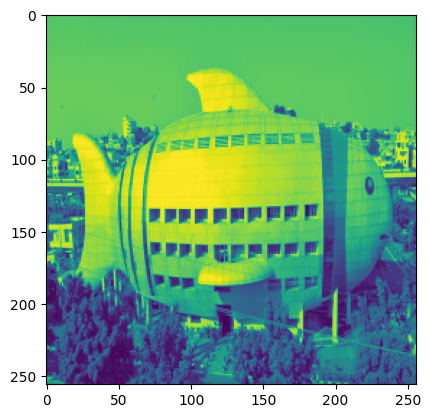

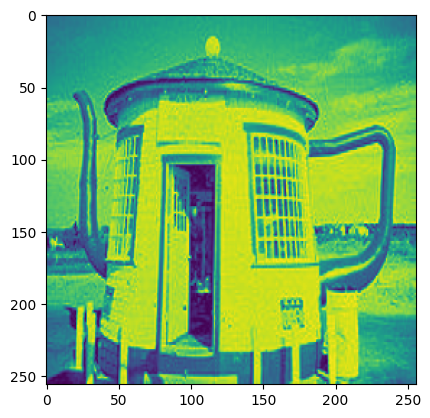

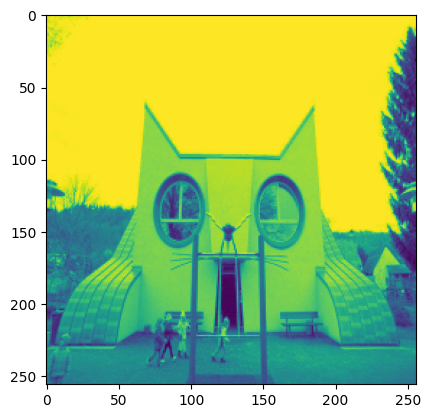

In [4]:
# Explore data 

file_jpg = glob.glob(f'architectural-styles-dataset/**/{styles[5]}/*.jpg', recursive=True)

dim = (256,256)

for i, f in enumerate(file_jpg[:5]):
    img = cv2.imread(f)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.show()

In [22]:
# Prep data

# - Canny edges to eliminate noise 

X = []
y = []

dim = (256,256)

for style in styles:
    file_jpg = glob.glob(f'architectural-styles-dataset/**/{style}/*.jpg', recursive=True)

    for i, f in enumerate(file_jpg):
        img = cv2.imread(f)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = img.astype('float32')
        img /= 255 
        X.append(img)
        y.append(style)
        

In [23]:
# Cast labels to integers 
y = [styles.index(label) for label in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [24]:
len(X_train), len(X_test), len(X_valid), len(y_train), len(y_test), len(y_valid)

(510, 160, 128, 510, 160, 128)

In [25]:
X_train[0], y_train[0]

(array([[0.7019608 , 0.69803923, 0.6862745 , ..., 0.2509804 , 0.2509804 ,
         0.2509804 ],
        [0.7058824 , 0.69803923, 0.6901961 , ..., 0.2509804 , 0.2509804 ,
         0.2509804 ],
        [0.70980394, 0.7019608 , 0.69411767, ..., 0.2509804 , 0.2509804 ,
         0.2509804 ],
        ...,
        [0.2784314 , 0.53333336, 0.39607844, ..., 0.44705883, 0.4       ,
         0.36862746],
        [0.16862746, 0.49411765, 0.42352942, ..., 0.5254902 , 0.45882353,
         0.47058824],
        [0.17254902, 0.3647059 , 0.41568628, ..., 0.7176471 , 0.49803922,
         0.5176471 ]], dtype=float32),
 1)

In [26]:
# Building sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [256, 256]),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_5 (Dense)             (None, 256)               16777472  
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 16821034 (64.17 MB)
Trainable params: 16

In [28]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [29]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [30]:
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 40)

Epoch 1/40
16/16 [==============================] - 3s 164ms/step - loss: 6.4353 - accuracy: 0.5059 - val_loss: 7.8906 - val_accuracy: 0.5234
Epoch 2/40
16/16 [==============================] - 3s 164ms/step - loss: 2.8469 - accuracy: 0.5431 - val_loss: 3.8778 - val_accuracy: 0.5234
Epoch 3/40
16/16 [==============================] - 3s 157ms/step - loss: 1.5444 - accuracy: 0.5549 - val_loss: 1.8001 - val_accuracy: 0.5234
Epoch 4/40
16/16 [==============================] - 3s 165ms/step - loss: 1.0194 - accuracy: 0.5980 - val_loss: 1.9063 - val_accuracy: 0.5312
Epoch 5/40
16/16 [==============================] - 3s 162ms/step - loss: 1.8895 - accuracy: 0.5216 - val_loss: 0.7960 - val_accuracy: 0.6094
Epoch 6/40
16/16 [==============================] - 3s 162ms/step - loss: 1.2332 - accuracy: 0.5667 - val_loss: 0.7528 - val_accuracy: 0.5938
Epoch 7/40
16/16 [==============================] - 2s 155ms/step - loss: 1.7400 - accuracy: 0.5451 - val_loss: 2.2600 - val_accuracy: 0.5234
Epoch 

In [31]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 18ms/step - loss: 0.7745 - accuracy: 0.6375


[0.7744665145874023, 0.637499988079071]

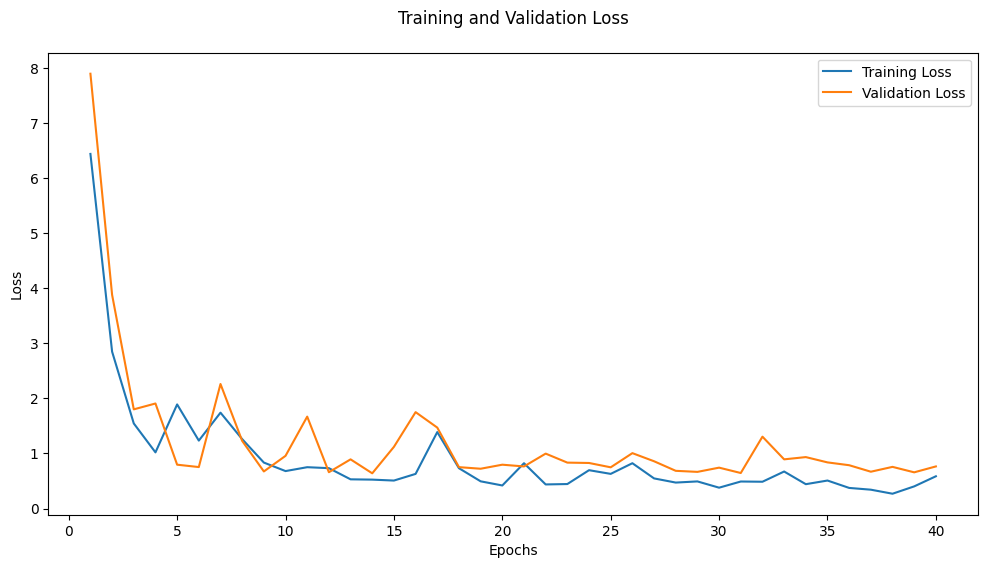

In [32]:
# Plot training and validation lost

plt.figure(figsize = (12, 6))
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 41)
sns.lineplot(x = epoch, y = train_loss, label = 'Training Loss')
sns.lineplot(x = epoch, y = val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

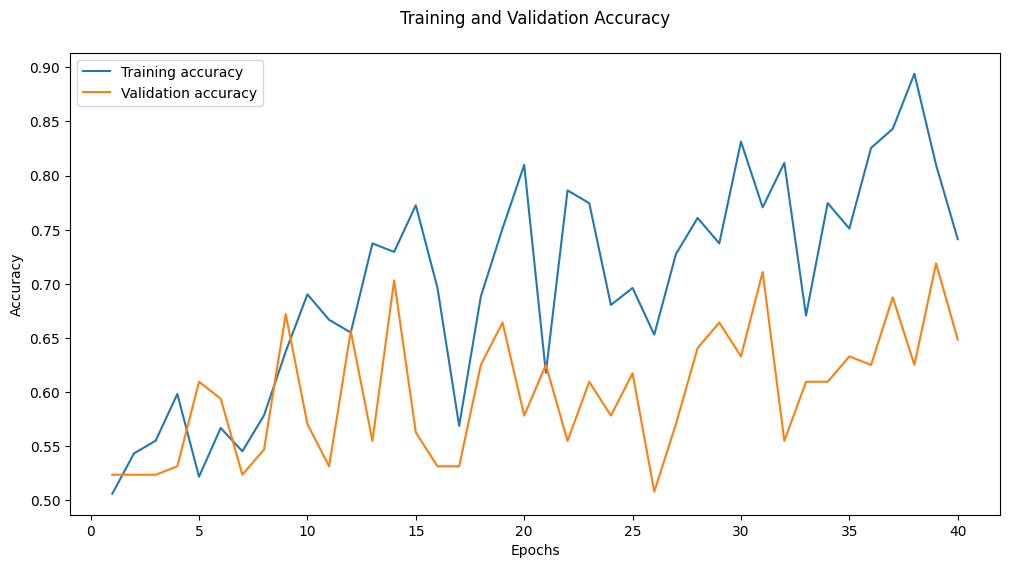

In [33]:
# Plot training and validation accuracy

plt.figure(figsize = (12, 6))
train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 41)
sns.lineplot(x = epoch, y = train_loss, label = 'Training accuracy')
sns.lineplot(x = epoch, y = val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [34]:
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

y_pred, y_test

5/5 [==============================] - 0s 14ms/step


(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1], dtype=int64),
 array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 

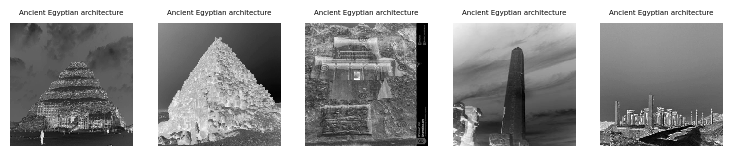

In [35]:
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_test[:5]):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(styles[y_pred[index]], fontsize=5)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

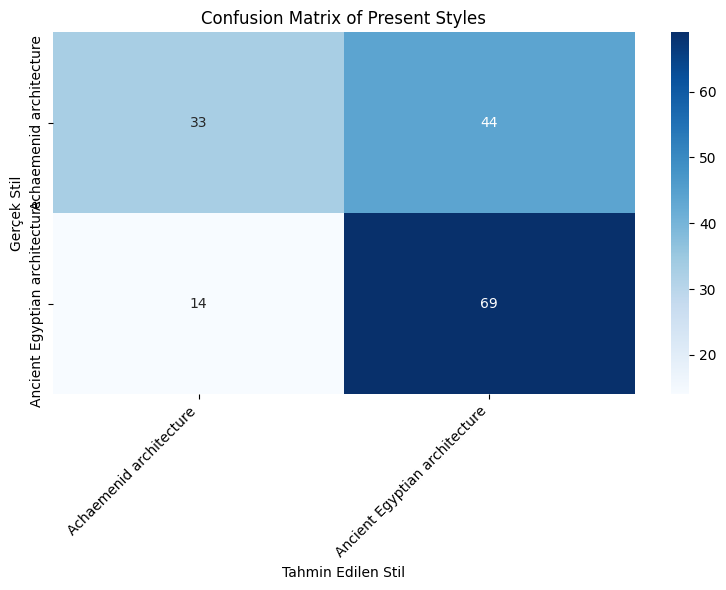

In [36]:
y_true = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)

# 2) Confusion matrix (tüm sınıflar için)
labels = list(range(len(styles)))  # [0,1,2,...,9]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Hangi sınıflar var?
present = np.unique(np.concatenate([y_true, y_pred]))
# Bu sınıfların isimleri:
present_names = [styles[i] for i in present]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=present)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=present_names,
            yticklabels=present_names)
plt.xlabel('Tahmin Edilen Stil')
plt.ylabel('Gerçek Stil')
plt.title('Confusion Matrix of Present Styles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()